Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

THE NORMAL (GAUSSIAN) DISTRIBUTION

Properties:
1. Bell-shaped and symmetric
2. Defined by two parameters: µ (mean) and s² (variance)
3. Notation: X ~ N(µ, s²)
4. Area under curve = 1 (total probability)
5. Extends from -8 to +8

When it appears:
- Many biological measurements (height, weight, etc.)
- Measurement errors
- Sums and averages of random variables (CLT!)
- SAMPLING DISTRIBUTIONS (key for inference)

EFFECT OF PARAMETERS µ AND s

Changing µ shifts the distribution left/right
(Changes location, not shape)



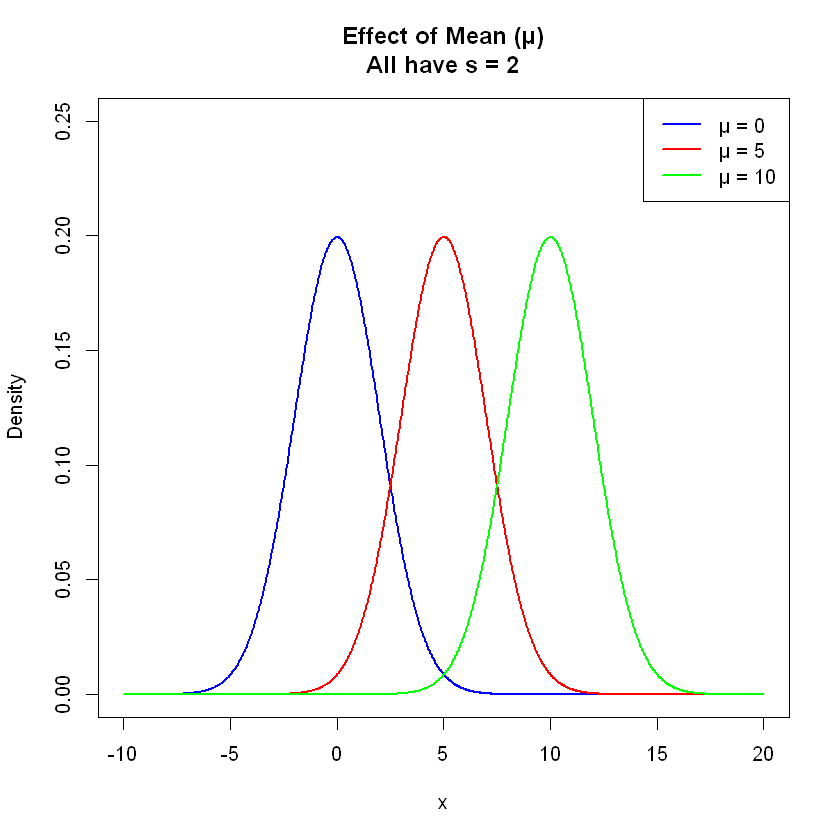

Changing s changes the spread
- Larger s <U+2192> wider, shorter curve
- Smaller s <U+2192> narrower, taller curve

GENERATING NORMAL DATA

Generated 1000 heights from N(175, 7²)

Sample mean: 175.03 cm (expected: 175)
Sample SD: 6.88 cm (expected: 7)



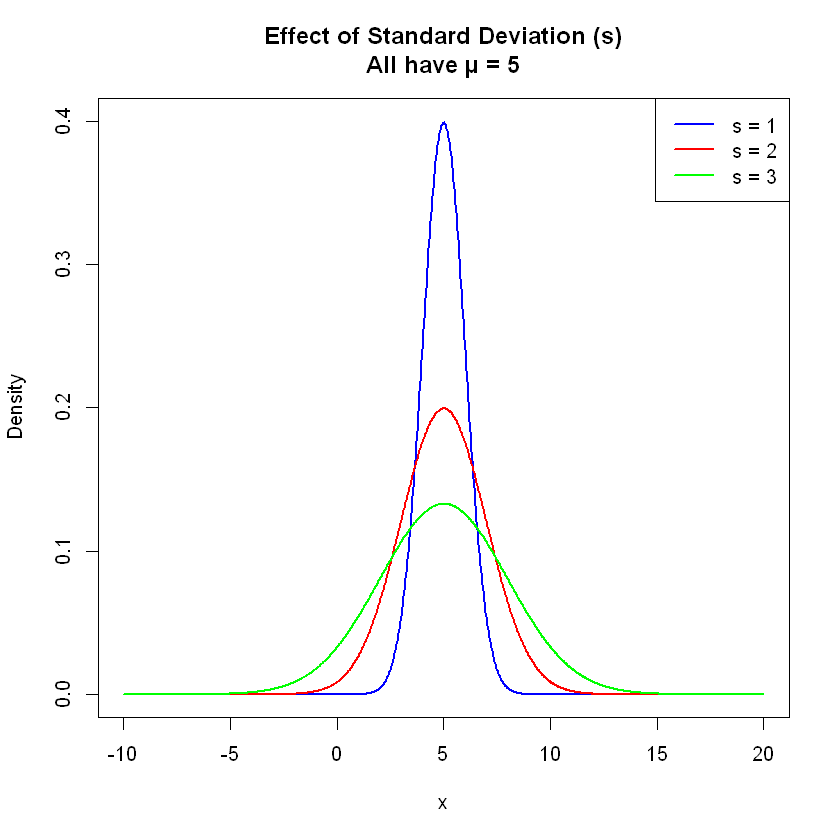


THE EMPIRICAL RULE (68-95-99.7 RULE)

For ANY normal distribution:
• 68% of data within µ ± 1s
• 95% of data within µ ± 2s
• 99.7% of data within µ ± 3s

For our heights (µ=175, s=7):
• 68% between 168 and 182 cm
• 95% between 161 and 189 cm
• 99.7% between 154 and 196 cm

From our simulated data:
Within 1s: 69.2 % (expected 68%)
Within 2s: 95.9 % (expected 95%)
Within 3s: 99.8 % (expected 99.7%)



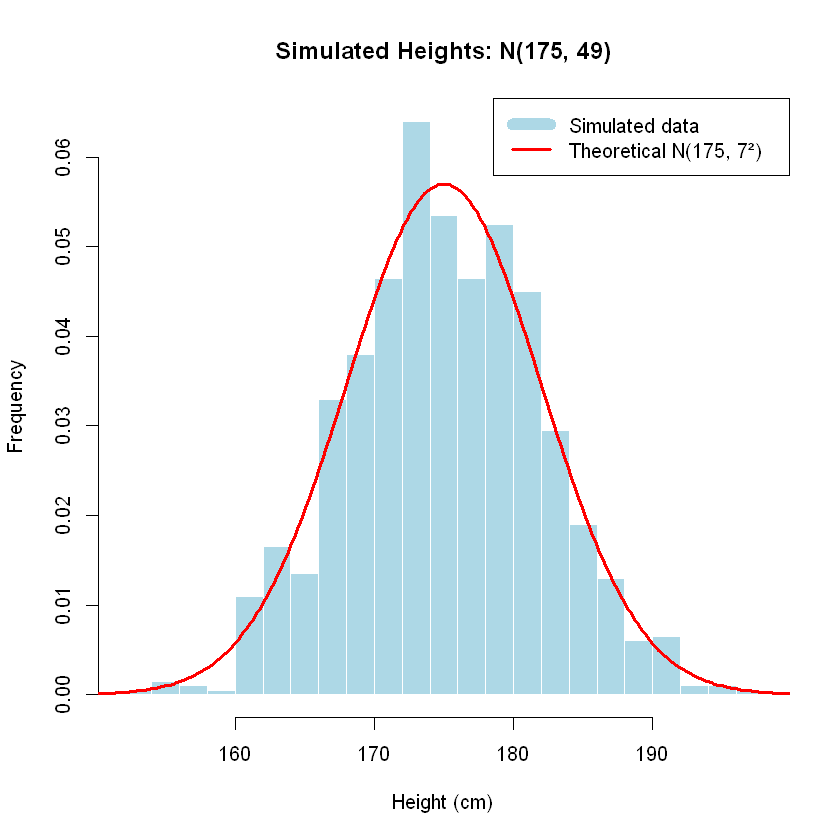


Z-SCORES: STANDARDIZATION

Z-score formula: z = (x - µ) / s

Interpretation: Number of standard deviations from the mean

Height examples:
Height = 168 cm <U+2192> z = -1.00
Height = 175 cm <U+2192> z = 0.00
Height = 182 cm <U+2192> z = 1.00
Height = 189 cm <U+2192> z = 2.00
Height = 196 cm <U+2192> z = 3.00

Interpretation:
• z = 0: Exactly at the mean
• z = 1: One SD above mean
• z = -1: One SD below mean
• |z| > 2: Unusual (beyond 95% of data)
• |z| > 3: Very unusual (beyond 99.7%)

Standardized heights:
Mean: 0.005 (should be 0)
SD: 0.983 (should be 1)



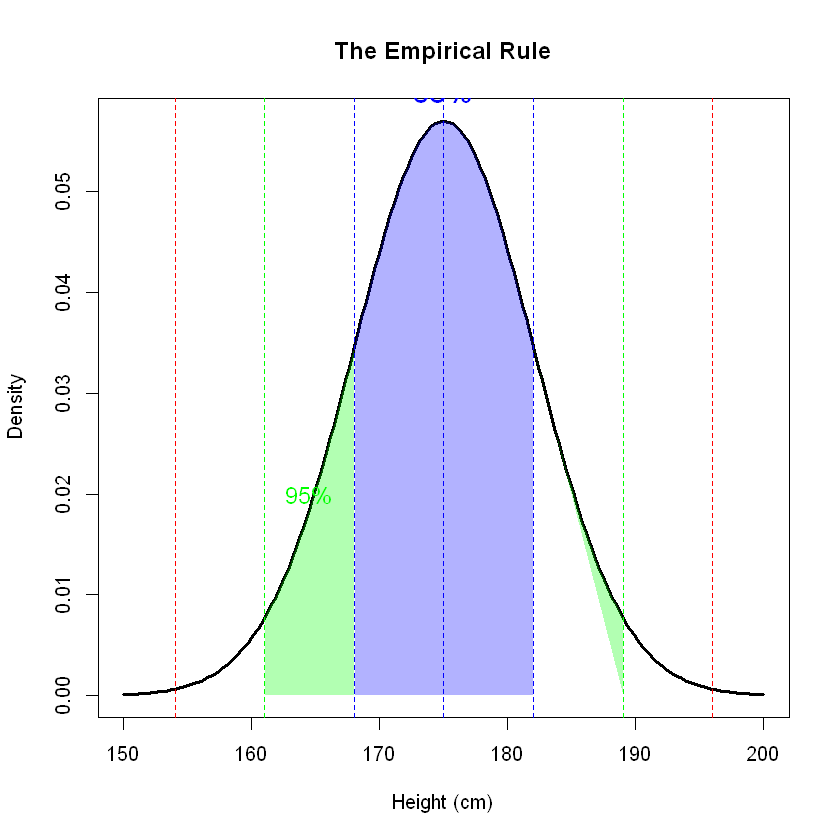


CALCULATING PROBABILITIES

Question 1: What proportion of men are taller than 185 cm?
P(X > 185) = 0.0766 
About 7.7 %

From simulation: 0.074 

Question 2: What proportion are shorter than 165 cm?
P(X < 165) = 0.0766 
About 7.7 %

Question 3: What proportion are between 170 and 180 cm?
P(170 < X < 180) = 0.5249 
About 52.5 %

Question 4: What height corresponds to the 90th percentile?
90th percentile = 184 cm
(90% of men are shorter than this)

Question 5: What range contains the middle 80% of heights?
Middle 80%: from 166 to 184 cm

THE STANDARD NORMAL: N(0, 1)

Standard normal has µ = 0, s = 1
ANY normal can be converted to standard normal via z-scores

Important probabilities for N(0, 1):
P(Z < 1.96) = 0.975  <U+2192> P(|Z| < 1.96) = 0.95
P(Z < 2.58) = 0.9951  <U+2192> P(|Z| < 2.58) = 0.99
P(Z < 1.645) = 0.95  (one-tailed 95%)

These numbers will be important for confidence intervals!



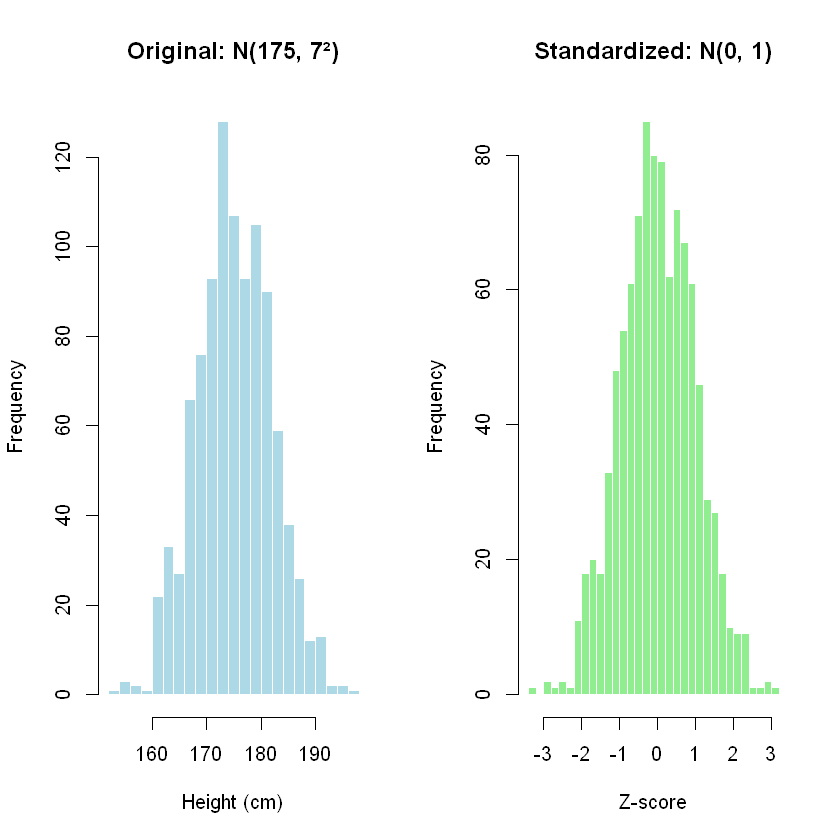


ASSESSING NORMALITY: Q-Q PLOTS

Q-Q (Quantile-Quantile) plot:
Compares data quantiles to theoretical normal quantiles
If data is normal <U+2192> points fall on straight line



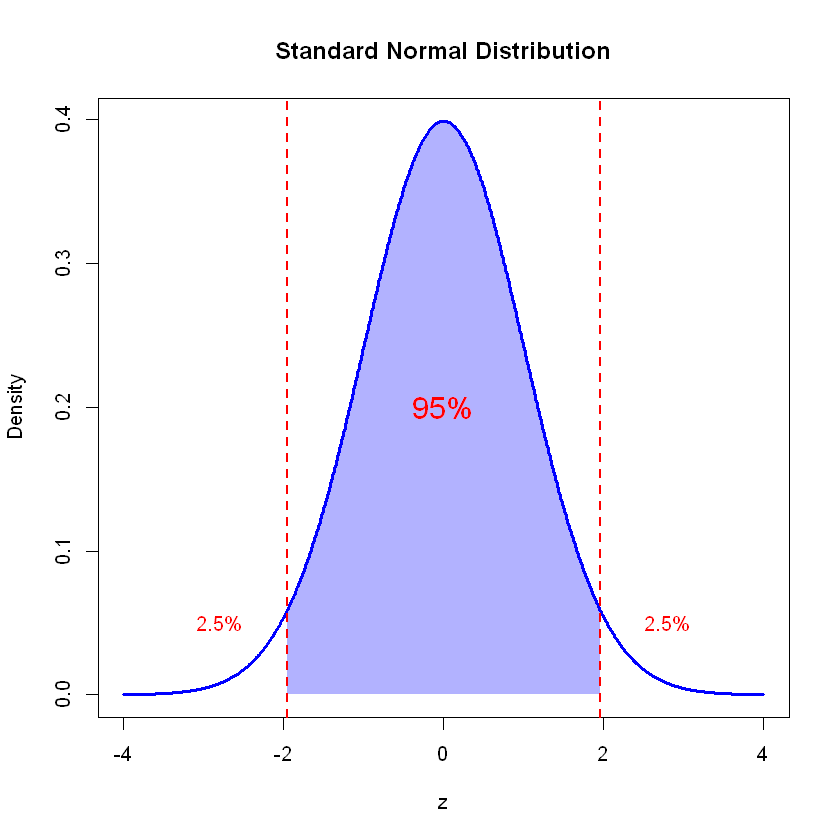

INTERPRETATION:
• Straight line <U+2192> normal
• S-curve <U+2192> skewed
• Points deviate at ends <U+2192> heavy or light tails

YOUR TURN: EXPLORE THE NORMAL


WHY THE NORMAL IS SO IMPORTANT:

1. CENTRAL LIMIT THEOREM:
   Sample means are approximately normal, regardless of
   the original distribution (if n is large enough)

2. BASIS FOR INFERENCE:
   t-tests, ANOVA, regression all assume normality
   (of residuals or sampling distributions)

3. MATHEMATICAL CONVENIENCE:
   - Sums of normals are normal
   - Linear combinations of normals are normal
   - Well-studied, extensive theory

4. MAXIMUM ENTROPY:
   If you only know mean and variance, normal distribution
   makes fewest assumptions (maximum entropy principle)

5. APPROXIMATION:
   Many distributions (binomial, Poisson) <U+2192> normal as n increases



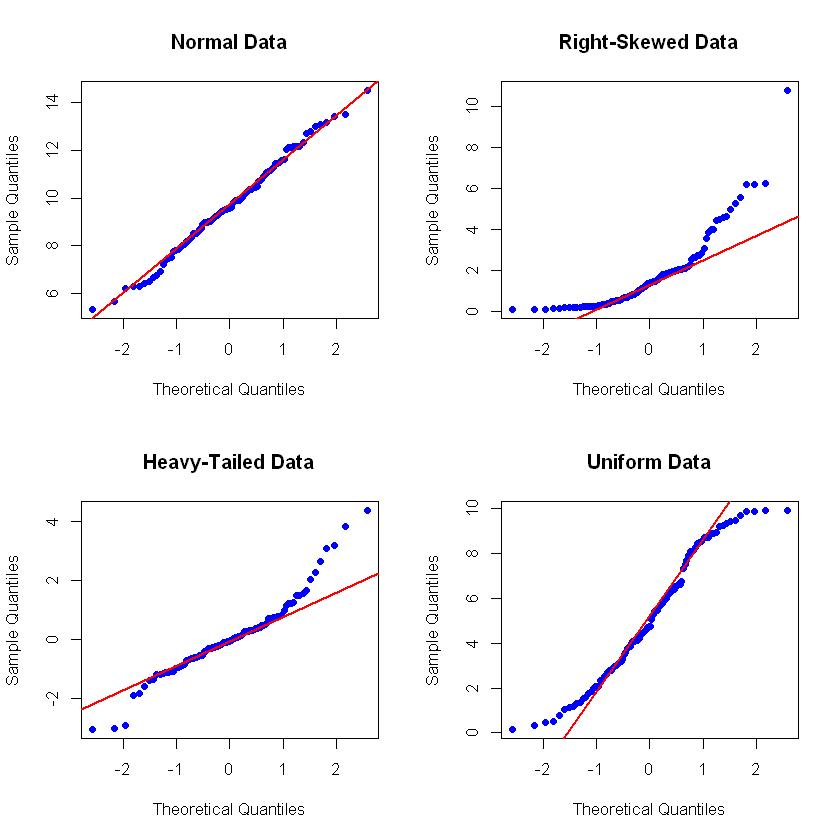

In [1]:
# =============================================================================
# Activity 8: Normal Distribution Deep Dive
# =============================================================================
# 
# GOAL: Master the normal distribution - the foundation of statistics
#
# CONCEPTS: Normal distribution, standard normal, z-scores, 
#           empirical rule (68-95-99.7), probabilities
#
# WHY IT MATTERS: Most statistical inference assumes normality
#                 (of residuals, of sampling distributions)
# =============================================================================

# -----------------------------------------------------------------------------
# PART 1: The Normal Distribution
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("THE NORMAL (GAUSSIAN) DISTRIBUTION\n")
cat("=================================================================\n\n")

cat("Properties:\n")
cat("1. Bell-shaped and symmetric\n")
cat("2. Defined by two parameters: μ (mean) and σ² (variance)\n")
cat("3. Notation: X ~ N(μ, σ²)\n")
cat("4. Area under curve = 1 (total probability)\n")
cat("5. Extends from -∞ to +∞\n\n")

cat("When it appears:\n")
cat("- Many biological measurements (height, weight, etc.)\n")
cat("- Measurement errors\n")
cat("- Sums and averages of random variables (CLT!)\n")
cat("- SAMPLING DISTRIBUTIONS (key for inference)\n\n")


# -----------------------------------------------------------------------------
# PART 2: Visualizing Different Normal Distributions
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("EFFECT OF PARAMETERS μ AND σ\n")
cat("=================================================================\n\n")

# Create sequence of x values
x <- seq(-10, 20, length.out = 1000)

# Different means, same variance
plot(x, dnorm(x, mean = 0, sd = 2), 
     type = "l", lwd = 2, col = "blue",
     main = "Effect of Mean (μ)\nAll have σ = 2",
     xlab = "x", ylab = "Density",
     ylim = c(0, 0.25))
lines(x, dnorm(x, mean = 5, sd = 2), lwd = 2, col = "red")
lines(x, dnorm(x, mean = 10, sd = 2), lwd = 2, col = "green")
legend("topright", 
       c("μ = 0", "μ = 5", "μ = 10"),
       col = c("blue", "red", "green"),
       lwd = 2)

cat("Changing μ shifts the distribution left/right\n")
cat("(Changes location, not shape)\n\n")

# Same mean, different variances
plot(x, dnorm(x, mean = 5, sd = 1), 
     type = "l", lwd = 2, col = "blue",
     main = "Effect of Standard Deviation (σ)\nAll have μ = 5",
     xlab = "x", ylab = "Density",
     ylim = c(0, 0.4))
lines(x, dnorm(x, mean = 5, sd = 2), lwd = 2, col = "red")
lines(x, dnorm(x, mean = 5, sd = 3), lwd = 2, col = "green")
legend("topright",
       c("σ = 1", "σ = 2", "σ = 3"),
       col = c("blue", "red", "green"),
       lwd = 2)

cat("Changing σ changes the spread\n")
cat("- Larger σ → wider, shorter curve\n")
cat("- Smaller σ → narrower, taller curve\n\n")


# -----------------------------------------------------------------------------
# PART 3: Generating Normal Data
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("GENERATING NORMAL DATA\n")
cat("=================================================================\n\n")

set.seed(2024)

# Generate data: height of adult males
# Mean = 175 cm, SD = 7 cm
n <- 1000
heights <- rnorm(n, mean = 175, sd = 7)

cat("Generated", n, "heights from N(175, 7²)\n\n")
cat("Sample mean:", round(mean(heights), 2), "cm (expected: 175)\n")
cat("Sample SD:", round(sd(heights), 2), "cm (expected: 7)\n\n")

# Plot
hist(heights,
     breaks = 30,
     col = "lightblue",
     border = "white",
     main = "Simulated Heights: N(175, 49)",
     xlab = "Height (cm)",
     ylab = "Frequency",
     probability = TRUE)

# Overlay theoretical density
x_smooth <- seq(150, 200, length.out = 200)
theoretical <- dnorm(x_smooth, mean = 175, sd = 7)
lines(x_smooth, theoretical, col = "red", lwd = 3)

legend("topright",
       c("Simulated data", "Theoretical N(175, 7²)"),
       col = c("lightblue", "red"),
       lwd = c(10, 3))


# -----------------------------------------------------------------------------
# PART 4: The Empirical Rule (68-95-99.7)
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("THE EMPIRICAL RULE (68-95-99.7 RULE)\n")
cat("=================================================================\n\n")

mu <- 175
sigma <- 7

cat("For ANY normal distribution:\n")
cat("• 68% of data within μ ± 1σ\n")
cat("• 95% of data within μ ± 2σ\n")
cat("• 99.7% of data within μ ± 3σ\n\n")

cat("For our heights (μ=175, σ=7):\n")
cat("• 68% between", mu - sigma, "and", mu + sigma, "cm\n")
cat("• 95% between", mu - 2*sigma, "and", mu + 2*sigma, "cm\n")
cat("• 99.7% between", mu - 3*sigma, "and", mu + 3*sigma, "cm\n\n")

# Verify with our data
within_1sd <- sum(heights >= mu - sigma & heights <= mu + sigma) / n
within_2sd <- sum(heights >= mu - 2*sigma & heights <= mu + 2*sigma) / n
within_3sd <- sum(heights >= mu - 3*sigma & heights <= mu + 3*sigma) / n

cat("From our simulated data:\n")
cat("Within 1σ:", round(within_1sd * 100, 1), "% (expected 68%)\n")
cat("Within 2σ:", round(within_2sd * 100, 1), "% (expected 95%)\n")
cat("Within 3σ:", round(within_3sd * 100, 1), "% (expected 99.7%)\n\n")

# Visualize
plot(x_smooth, theoretical, 
     type = "l", lwd = 3, col = "black",
     main = "The Empirical Rule",
     xlab = "Height (cm)", ylab = "Density",
     xlim = c(150, 200))

# Shade regions
x_1sd <- x_smooth[x_smooth >= mu - sigma & x_smooth <= mu + sigma]
polygon(c(mu - sigma, x_1sd, mu + sigma),
        c(0, dnorm(x_1sd, mu, sigma), 0),
        col = rgb(0, 0, 1, 0.3), border = NA)

x_2sd <- x_smooth[x_smooth >= mu - 2*sigma & x_smooth <= mu + 2*sigma & 
                  (x_smooth < mu - sigma | x_smooth > mu + sigma)]
polygon(c(mu - 2*sigma, x_2sd[x_2sd < mu], mu - sigma, mu - sigma),
        c(0, dnorm(x_2sd[x_2sd < mu], mu, sigma), dnorm(mu - sigma, mu, sigma), 0),
        col = rgb(0, 1, 0, 0.3), border = NA)
polygon(c(mu + sigma, x_2sd[x_2sd > mu], mu + 2*sigma, mu + 2*sigma),
        c(dnorm(mu + sigma, mu, sigma), dnorm(x_2sd[x_2sd > mu], mu, sigma), 0, 0),
        col = rgb(0, 1, 0, 0.3), border = NA)

abline(v = c(mu - sigma, mu, mu + sigma), lty = 2, col = "blue")
abline(v = c(mu - 2*sigma, mu + 2*sigma), lty = 2, col = "green")
abline(v = c(mu - 3*sigma, mu + 3*sigma), lty = 2, col = "red")

text(mu, 0.06, "68%", col = "blue", cex = 1.5)
text(mu - 1.5*sigma, 0.02, "95%", col = "green", cex = 1.2)


# -----------------------------------------------------------------------------
# PART 5: Z-Scores (Standardization)
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("Z-SCORES: STANDARDIZATION\n")
cat("=================================================================\n\n")

cat("Z-score formula: z = (x - μ) / σ\n\n")
cat("Interpretation: Number of standard deviations from the mean\n\n")

# Examples
heights_examples <- c(168, 175, 182, 189, 196)
z_scores <- (heights_examples - mu) / sigma

cat("Height examples:\n")
for (i in 1:length(heights_examples)) {
  cat(sprintf("Height = %d cm → z = %.2f\n", heights_examples[i], z_scores[i]))
}

cat("\nInterpretation:\n")
cat("• z = 0: Exactly at the mean\n")
cat("• z = 1: One SD above mean\n")
cat("• z = -1: One SD below mean\n")
cat("• |z| > 2: Unusual (beyond 95% of data)\n")
cat("• |z| > 3: Very unusual (beyond 99.7%)\n\n")

# Standardize all data
z_heights <- (heights - mu) / sigma

cat("Standardized heights:\n")
cat("Mean:", round(mean(z_heights), 3), "(should be 0)\n")
cat("SD:", round(sd(z_heights), 3), "(should be 1)\n\n")

# Plot original and standardized
par(mfrow = c(1, 2))

hist(heights, breaks = 30, col = "lightblue", border = "white",
     main = "Original: N(175, 7²)",
     xlab = "Height (cm)")

hist(z_heights, breaks = 30, col = "lightgreen", border = "white",
     main = "Standardized: N(0, 1)",
     xlab = "Z-score")

par(mfrow = c(1, 1))


# -----------------------------------------------------------------------------
# PART 6: Calculating Probabilities
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("CALCULATING PROBABILITIES\n")
cat("=================================================================\n\n")

# Four key functions:
# dnorm(x, mean, sd) - density (height of curve)
# pnorm(x, mean, sd) - P(X ≤ x)
# qnorm(p, mean, sd) - inverse: what x gives P(X ≤ x) = p?
# rnorm(n, mean, sd) - generate random values

mu <- 175
sigma <- 7

cat("Question 1: What proportion of men are taller than 185 cm?\n")
p_taller_185 <- 1 - pnorm(185, mean = mu, sd = sigma)
cat("P(X > 185) =", round(p_taller_185, 4), "\n")
cat("About", round(p_taller_185 * 100, 1), "%\n\n")

# Verify with data
simulated_p <- mean(heights > 185)
cat("From simulation:", round(simulated_p, 4), "\n\n")


cat("Question 2: What proportion are shorter than 165 cm?\n")
p_shorter_165 <- pnorm(165, mean = mu, sd = sigma)
cat("P(X < 165) =", round(p_shorter_165, 4), "\n")
cat("About", round(p_shorter_165 * 100, 1), "%\n\n")


cat("Question 3: What proportion are between 170 and 180 cm?\n")
p_between <- pnorm(180, mean = mu, sd = sigma) - pnorm(170, mean = mu, sd = sigma)
cat("P(170 < X < 180) =", round(p_between, 4), "\n")
cat("About", round(p_between * 100, 1), "%\n\n")


cat("Question 4: What height corresponds to the 90th percentile?\n")
height_90th <- qnorm(0.90, mean = mu, sd = sigma)
cat("90th percentile =", round(height_90th, 1), "cm\n")
cat("(90% of men are shorter than this)\n\n")


cat("Question 5: What range contains the middle 80% of heights?\n")
lower_10th <- qnorm(0.10, mean = mu, sd = sigma)
upper_90th <- qnorm(0.90, mean = mu, sd = sigma)
cat("Middle 80%: from", round(lower_10th, 1), "to", round(upper_90th, 1), "cm\n\n")


# -----------------------------------------------------------------------------
# PART 7: The Standard Normal Distribution
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("THE STANDARD NORMAL: N(0, 1)\n")
cat("=================================================================\n\n")

cat("Standard normal has μ = 0, σ = 1\n")
cat("ANY normal can be converted to standard normal via z-scores\n\n")

# Key probabilities to remember
cat("Important probabilities for N(0, 1):\n")
cat("P(Z < 1.96) =", round(pnorm(1.96), 4), " → P(|Z| < 1.96) = 0.95\n")
cat("P(Z < 2.58) =", round(pnorm(2.58), 4), " → P(|Z| < 2.58) = 0.99\n")
cat("P(Z < 1.645) =", round(pnorm(1.645), 4), " (one-tailed 95%)\n\n")

cat("These numbers will be important for confidence intervals!\n\n")

# Visualize
z <- seq(-4, 4, length.out = 1000)
plot(z, dnorm(z),
     type = "l", lwd = 3, col = "blue",
     main = "Standard Normal Distribution",
     xlab = "z", ylab = "Density")

# Shade middle 95%
z_middle <- z[z >= -1.96 & z <= 1.96]
polygon(c(-1.96, z_middle, 1.96),
        c(0, dnorm(z_middle), 0),
        col = rgb(0, 0, 1, 0.3), border = NA)

abline(v = c(-1.96, 1.96), lty = 2, col = "red", lwd = 2)
text(0, 0.2, "95%", cex = 1.5, col = "red")
text(-2.8, 0.05, "2.5%", col = "red")
text(2.8, 0.05, "2.5%", col = "red")


# -----------------------------------------------------------------------------
# PART 8: Assessing Normality - Q-Q Plots
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("ASSESSING NORMALITY: Q-Q PLOTS\n")
cat("=================================================================\n\n")

cat("Q-Q (Quantile-Quantile) plot:\n")
cat("Compares data quantiles to theoretical normal quantiles\n")
cat("If data is normal → points fall on straight line\n\n")

par(mfrow = c(2, 2))

# Normal data
normal_data <- rnorm(100, mean = 10, sd = 2)
qqnorm(normal_data, main = "Normal Data", pch = 16, col = "blue")
qqline(normal_data, col = "red", lwd = 2)

# Right-skewed data
skewed_data <- rexp(100, rate = 0.5)
qqnorm(skewed_data, main = "Right-Skewed Data", pch = 16, col = "blue")
qqline(skewed_data, col = "red", lwd = 2)

# Heavy-tailed data
heavy_data <- rt(100, df = 3)
qqnorm(heavy_data, main = "Heavy-Tailed Data", pch = 16, col = "blue")
qqline(heavy_data, col = "red", lwd = 2)

# Uniform data
uniform_data <- runif(100, min = 0, max = 10)
qqnorm(uniform_data, main = "Uniform Data", pch = 16, col = "blue")
qqline(uniform_data, col = "red", lwd = 2)

par(mfrow = c(1, 1))

cat("INTERPRETATION:\n")
cat("• Straight line → normal\n")
cat("• S-curve → skewed\n")
cat("• Points deviate at ends → heavy or light tails\n\n")


# -----------------------------------------------------------------------------
# PART 9: YOUR TURN - Explore!
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("YOUR TURN: EXPLORE THE NORMAL\n")
cat("=================================================================\n\n")

# TODO 1: Blood pressure
# Systolic BP: N(120, 15²) mmHg
# What proportion have BP > 140 (hypertensive)?
# What proportion have BP < 90 (hypotensive)?
# What BP corresponds to 75th percentile?


# TODO 2: Standardize and compare
# Generate two datasets:
#   - Heights: N(175, 7²)
#   - Weights: N(75, 10²)
# Standardize both
# Who is more unusual: person 180cm tall or weighing 90kg?


# TODO 3: Confidence interval preview
# If sample mean ~ N(μ, σ²/n), then 95% of sample means
# fall within μ ± 1.96 × σ/√n
# Try: μ = 100, σ = 15, n = 25
# Calculate the interval
# Simulate 1000 sample means and verify ~95% fall in interval


# TODO 4: Find critical values
# What z-score leaves 5% in the upper tail?
# What z-score leaves 10% in the lower tail?
# What z-scores capture middle 90%?


# TODO 5: Non-normal data
# Generate exponential data: x <- rexp(100, rate = 1)
# Make Q-Q plot
# Take log(x) and make Q-Q plot of that
# Does log transformation make it more normal?


# -----------------------------------------------------------------------------
# PART 10: Why Normal Distribution is Central to Statistics
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("WHY THE NORMAL IS SO IMPORTANT:\n")
cat("=================================================================\n\n")

cat("1. CENTRAL LIMIT THEOREM:\n")
cat("   Sample means are approximately normal, regardless of\n")
cat("   the original distribution (if n is large enough)\n\n")

cat("2. BASIS FOR INFERENCE:\n")
cat("   t-tests, ANOVA, regression all assume normality\n")
cat("   (of residuals or sampling distributions)\n\n")

cat("3. MATHEMATICAL CONVENIENCE:\n")
cat("   - Sums of normals are normal\n")
cat("   - Linear combinations of normals are normal\n")
cat("   - Well-studied, extensive theory\n\n")

cat("4. MAXIMUM ENTROPY:\n")
cat("   If you only know mean and variance, normal distribution\n")
cat("   makes fewest assumptions (maximum entropy principle)\n\n")

cat("5. APPROXIMATION:\n")
cat("   Many distributions (binomial, Poisson) → normal as n increases\n\n")


# -----------------------------------------------------------------------------
# DISCUSSION QUESTIONS
# -----------------------------------------------------------------------------
#
# 1. Why is the normal distribution symmetric? What does this imply
#    about the relationship between mean, median, and mode?
#
# 2. If you're told data follows N(100, 15²), without calculating,
#    estimate what proportion falls between 85 and 115. (Use empirical rule)
#
# 3. Why do we care about z-scores? What advantage do they give us?
#
# 4. The normal distribution extends from -∞ to +∞. But height can't
#    be negative. Why is normal still a good model for height?
#
# 5. In Q-Q plots, what pattern indicates right-skewed data?
#    What about left-skewed?
#
# 6. Tomorrow we'll use the normal distribution for confidence intervals
#    and hypothesis tests. Based on what you learned today, why do you
#    think the normal distribution is suitable for this?
#
# =============================================================================